In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({'data': range(5)})

df['expanding_sum'] = df.data.expanding().sum()

df['cumulative_sum'] = df.data.cumsum()

df

,data,expanding_sum,cumulative_sum
0,0,0.0,0
1,1,1.0,1
2,2,3.0,3
3,3,6.0,6
4,4,10.0,10


In [3]:
# dados do indice bovespa

In [4]:
bovespa = pd.read_csv('./data/^BVSP-5Y.csv', index_col='Date', parse_dates = ['Date'])
bovespa.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
bovespa

,Adj Close
Date,
2017-05-31,62711.0
2017-06-01,62289.0
2017-06-02,62511.0
2017-06-05,62450.0
2017-06-06,62955.0
...,...
2022-05-24,110581.0
2022-05-25,110580.0
2022-05-26,111890.0


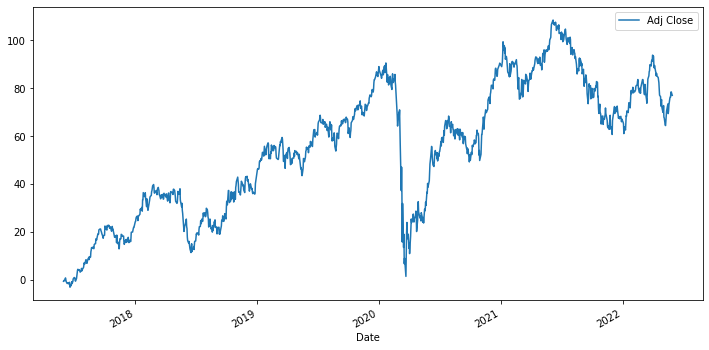

In [5]:
pr = bovespa.pct_change()

pr_plus_one = pr.add(1)

cumulative_returns = pr_plus_one.cumprod().sub(1)

cumulative_returns.mul(100).plot(figsize=(12, 6));

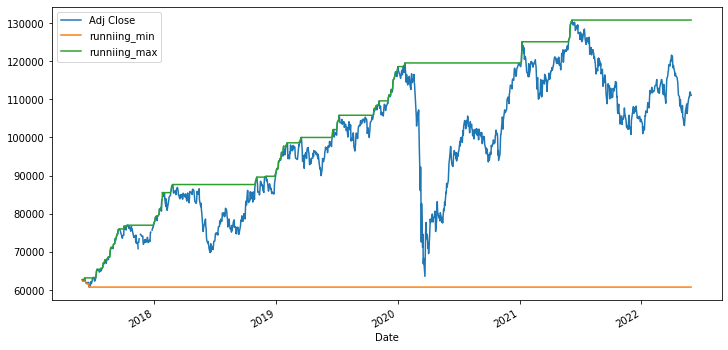

In [6]:
bovespa['runniing_min'] = bovespa['Adj Close'].expanding().min()

bovespa['runniing_max'] = bovespa['Adj Close'].expanding().max()

bovespa.plot(figsize=(12, 6));

In [7]:
# rollin anual rate
import numpy as np

In [8]:
def multi_period_return(periods_return):
    return np.prod(periods_return + 1) - 1

In [9]:
bovespa

,Adj Close,runniing_min,runniing_max
Date,,,
2017-05-31,62711.0,62711.0,62711.0
2017-06-01,62289.0,62289.0,62711.0
2017-06-02,62511.0,62289.0,62711.0
2017-06-05,62450.0,62289.0,62711.0
2017-06-06,62955.0,62289.0,62955.0
...,...,...,...
2022-05-24,110581.0,60762.0,130776.0
2022-05-25,110580.0,60762.0,130776.0
2022-05-26,111890.0,60762.0,130776.0


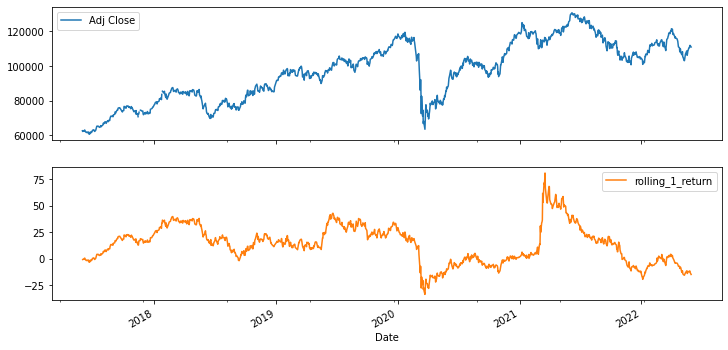

In [10]:
pr = bovespa['Adj Close'].pct_change()

r = pr.rolling(window='360D').apply(multi_period_return)

bovespa['rolling_1_return'] = r.mul(100)

bovespa[['Adj Close', 'rolling_1_return']].plot(subplots=True, figsize=(12, 6));